<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/10_Dimensionality_Reduction_in_Python/02_Feature_Selection_I-Selecting_for_Feature_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Feature Selection I - Selecting for Feature Information

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/ANSUR_II_MALE.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ansur_df = pd.read_csv(url)
display(ansur_df.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/fifa_18_sample_data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
fifa = pd.read_csv(url)
display(fifa.head())

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


**Train - test split**  
In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

ansur_df has been pre-loaded for you.

In [10]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/ansur_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ansur_df = pd.read_csv(url)
display(ansur_df.head())

# Select the Gender column as the feature to be predicted (y)
y = ansur_df["Gender"]

# Remove the Gender column to create the training data
X = ansur_df.drop("Gender", axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg
0,Male,274,1432,317,222,1330,242,196,392,350,...,1683,470,325,944,243,413,1066,176,872,81.2
1,Male,189,1446,326,205,1340,240,210,411,295,...,1593,475,283,759,181,359,1057,164,868,62.1
2,Male,237,1369,312,222,1254,244,188,383,343,...,1569,453,311,897,218,371,1011,175,805,75.8
3,Male,219,1411,341,220,1306,248,195,408,314,...,1580,444,299,852,219,368,1066,176,804,74.5
4,Male,285,1360,310,203,1252,232,182,395,357,...,1698,465,348,1001,261,386,961,162,833,81.9


60 rows in test set vs. 140 in training set, 92 Features.


**Fitting and testing the model**  
In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model (SVC()) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

In [12]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

# doesnt Looks like the model overfitted on the training data quite a bit.

88.3% accuracy on test set vs. 86.4% on training set


**Accuracy after dimensionality reduction**  
You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test versus training data.

All relevant packages and y have been pre-loaded.

In [13]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

# The single feature model outperforms the one trained on all features? This is an example of the curse of dimensionality!
# The model overfits when we feed it too many features. It overlooks that neck circumference by itself is pretty different for males and females.

95.0% accuracy on test set vs. 95.0% on training set


### Feature With missing values or little varience

**Finding a good variance threshold**  
You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as head_df.

,headbreadth,headcircumference,headlength,tragiontopofhead,n_hairs,measurement_error
0,150,583,206,140,100016.243454,0.1
1,146,568,201,120,99993.882436,0.1
2,148,573,202,125,99994.718282,0.1
3,158,576,199,127,99989.270314,0.1
4,153,566,197,122,100008.654076,0.1


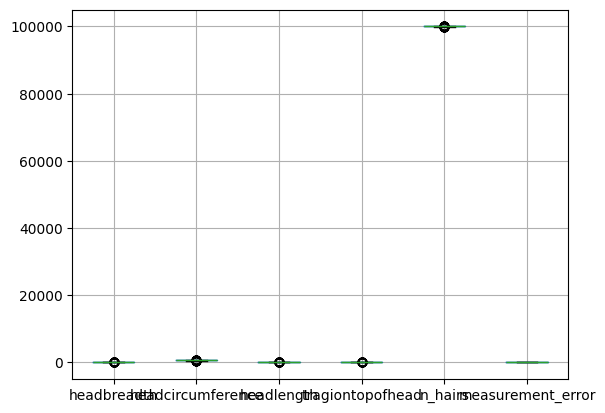

In [18]:

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/head_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
head_df = pd.read_csv(url)
display(head_df.head())


# Create the boxplot
head_df.boxplot()

plt.show()

In [19]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    0.000000e+00
dtype: float64


Inspect the printed variances. If you want to remove the 2 very low variance features. What would be a good variance threshold?

->  A threshold of 1.0e-03 (0.001) will remove the two low variance features.

**Features with low variance**  
In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in head_df after normalization. Now use the VarianceThreshold feature selector to remove these features.

In [20]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

# you've successfully removed the 2 low-variance features.

Dimensionality reduced from 6 to 4.


**Removing features with many missing values**   
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.



In [22]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset//Public_Schools2.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
school_df = pd.read_csv(url)
display(school_df.head())

print(school_df.isna().sum() / school_df.size)

# in what range lies highest ratio of missing values for a single feature in the dataset?   -> Between 0.9 and 1.0.

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.041803
complex       0.046892
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64


- Create a boolean mask on whether each feature has less than 50% missing values.
- Apply the mask to school_df to select columns without many missing values.

In [23]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

# The number of features went down from 21 to 19.

(131, 21)
(131, 19)


### Pairvise_correlation

**Inspecting the correlation matrix**   
A sample of the ANSUR body measurements dataset has been pre-loaded as ansur_df. Use the terminal to create a correlation matrix for this dataset.

What is the correlation coefficient between wrist and ankle circumference?

In [28]:
print(ansur_df.iloc[:, 2:7].corr())


                         acromialheight  acromionradialelength  \
acromialheight                 1.000000               0.864691   
acromionradialelength          0.864691               1.000000   
anklecircumference             0.563279               0.463188   
axillaheight                   0.991158               0.866625   
balloffootcircumference        0.717270               0.613935   

                         anklecircumference  axillaheight  \
acromialheight                     0.563279      0.991158   
acromionradialelength              0.463188      0.866625   
anklecircumference                 1.000000      0.532226   
axillaheight                       0.532226      1.000000   
balloffootcircumference            0.757181      0.690921   

                         balloffootcircumference  
acromialheight                          0.717270  
acromionradialelength                   0.613935  
anklecircumference                      0.757181  
axillaheight                    

**Visualizing the correlation matrix**  
Reading the correlation matrix of ansur_df in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

Seaborn has been pre-loaded as sns, matplotlib.pyplot as plt, NumPy as np and pandas as pd.

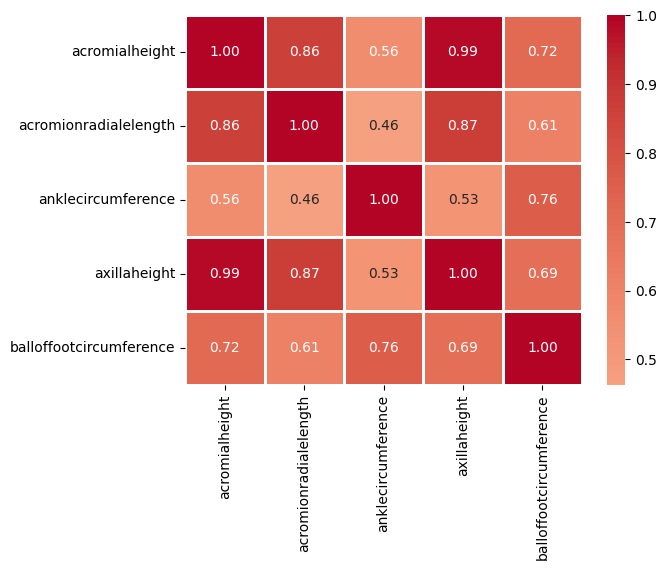

In [31]:
# Create the correlation matrix
corr = ansur_df.iloc[:, 2:7].corr()

# Define the colormap
cmap = plt.cm.coolwarm

# Draw a heatmap of the correlation matrix
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

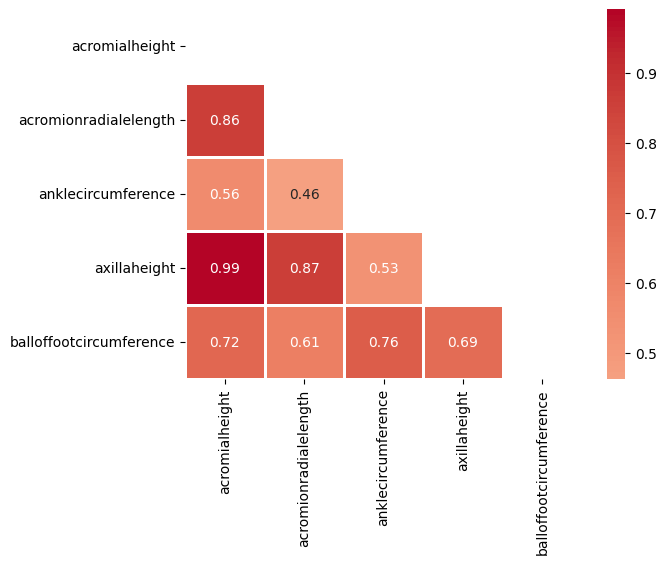

In [33]:
# Create the correlation matrix
corr = ansur_df.iloc[:, 2:7].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

### Filtering out highly correlated features
You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

In [35]:
# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.iloc[:, 2:7].corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

# You've automated the removal of highly correlated features.

The reduced_df DataFrame has 92 columns.


**Nuclear energy and pool drownings**   
The dataset that has been pre-loaded for you as weird_df contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.


**While the example is silly, you'll be amazed how often people misunderstand correlation versus causation.**